In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/high_diamond_ranked_10min.csv')
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [57]:
X = df.drop('blueWins', axis=1)
y = df['blueWins']

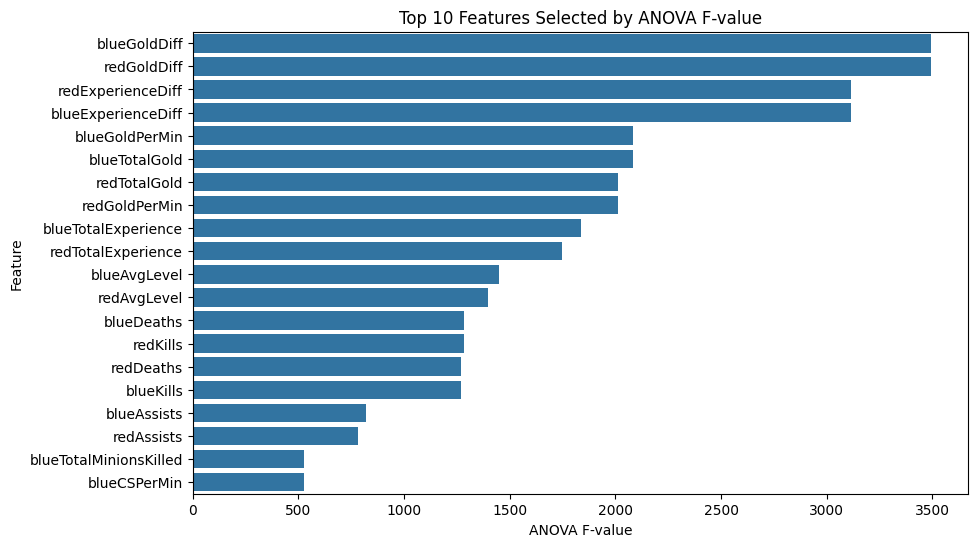

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': selector.scores_[selector.get_support()]})

feature_scores = feature_scores.sort_values('Score', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Top 10 Features Selected by ANOVA F-value')
plt.xlabel('ANOVA F-value')
plt.ylabel('Feature')
plt.show()

In [59]:
x = X[selected_features]

In [60]:
x

,blueKills,blueDeaths,blueAssists,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redKills,redDeaths,redAssists,redTotalGold,redAvgLevel,redTotalExperience,redGoldDiff,redExperienceDiff,redGoldPerMin
0,9,6,11,17210,6.6,17039,195,643,-8,19.5,1721.0,6,9,8,16567,6.8,17047,-643,8,1656.7
1,5,5,5,14712,6.6,16265,174,-2908,-1173,17.4,1471.2,5,5,2,17620,6.8,17438,2908,1173,1762.0
2,7,11,4,16113,6.4,16221,186,-1172,-1033,18.6,1611.3,11,7,14,17285,6.8,17254,1172,1033,1728.5
3,4,5,5,15157,7.0,17954,201,-1321,-7,20.1,1515.7,5,4,10,16478,7.0,17961,1321,7,1647.8
4,6,6,6,16400,7.0,18543,210,-1004,230,21.0,1640.0,6,6,7,17404,7.0,18313,1004,-230,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,7,4,5,17765,7.2,18967,211,2519,2469,21.1,1776.5,4,7,7,15246,6.8,16498,-2519,-2469,1524.6
9875,6,4,8,16238,7.2,19255,233,782,888,23.3,1623.8,4,6,3,15456,7.0,18367,-782,-888,1545.6
9876,6,7,5,15903,7.0,18032,210,-2416,-1877,21.0,1590.3,7,6,11,18319,7.4,19909,2416,1877,1831.9
9877,2,3,3,14459,6.6,17229,224,-839,-1085,22.4,1445.9,3,2,1,15298,7.2,18314,839,1085,1529.8


In [61]:
def handle_outliers_iqr(df):
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR

      df[column] = np.where(df[column] < lower_limit, lower_limit,
                             np.where(df[column] > upper_limit, upper_limit,
                                      df[column]))

  return df

x = handle_outliers_iqr(x)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
y.value_counts()

,count
blueWins,
0,4949
1,4930


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'DT':DecisionTreeClassifier()
}

params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DT': {'max_depth': [None, 10, 20, 30]}
}

best_models = {}

for model_name,model in models.items():
  ensemble_model = GridSearchCV(estimator=model, param_grid=params[model_name], cv=5)
  ensemble_model.fit(X_train, y_train)
  best_model = ensemble_model.best_estimator_

  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model_name} Accuracy: {accuracy}")

  best_models[model_name] = best_model

Logistic Regression Accuracy: 0.7282388663967612
Random Forest Accuracy: 0.7226720647773279
SVM Accuracy: 0.7312753036437247
DT Accuracy: 0.6852226720647774


In [71]:
best_model = best_models['SVM']
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       983
           1       0.74      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



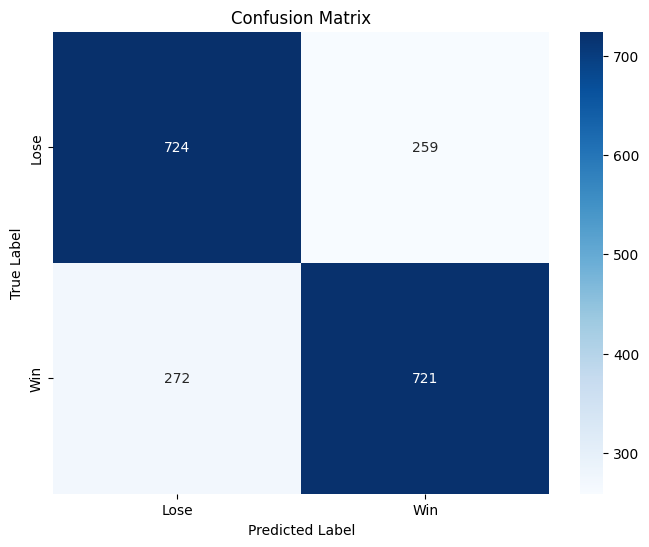

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lose', 'Win'], yticklabels=['Lose', 'Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#deep learning

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6365 - loss: 0.6313 - val_accuracy: 0.7287 - val_loss: 0.5481 - learning_rate: 0.0010
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7216 - loss: 0.5559 - val_accuracy: 0.7274 - val_loss: 0.5476 - learning_rate: 0.0010
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7242 - loss: 0.5490 - val_accuracy: 0.7306 - val_loss: 0.5460 - learning_rate: 0.0010
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7261 - loss: 0.5559 - val_accuracy: 0.7287 - val_loss: 0.5523 - learning_rate: 0.0010
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7296 - loss: 0.5507 - val_accuracy: 0.7331 - val_loss: 0.5407 - learning_rate: 0.0010
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7403 - loss: 0.5417 - val_accuracy: 0.7318 - val_loss: 0.5405 - learning_rate: 0.0010
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7397 - loss: 0.5374 - 

In [67]:
best_model = tf.keras.models.load_model('best_model.keras')
best_model.evaluate(X_test, y_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5359


[0.5328856110572815, 0.7282388806343079]

In [68]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



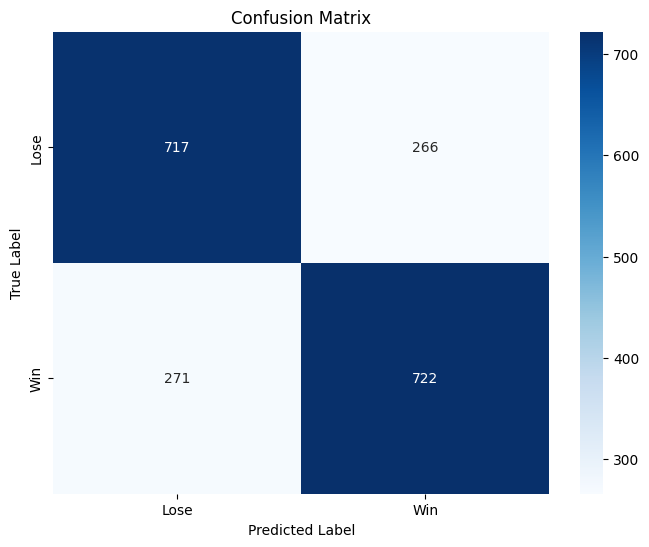

In [69]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lose', 'Win'], yticklabels=['Lose', 'Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()